# Machine Learning I: Introduction to Supervised Classification Methods

CONCEPTS

## PART 1: A practical approach to machine learning

1. About the software.

2. What is Machine Learning?

3. Modeling the machine learning problem

4. The supervised classification problem. A basic guided programatic example

    4.1 Representing the problem in sklearn
    
    4.2 Learning and predicting
    
    4.3 More about the feature space
    
    4.4 Training and testing
    
    4.5 Model selection (I)

## PART 2: Learning concepts and theory

5. What is learning?

    5.1 PAC-learning
      
6. Inside the learning model

    6.4 The human machine learning algorithm
    
    6.5 Model class and hypothesis space
    
    6.6 Objective function
    
    6.7 Searching/Optimization/Learning algorithm
    
7. Learning curves and overfitting

    7.1 Learning curves
    
    7.2 Overfitting
        
8. Cures to overfitting

    8.1 Model selection (II)
    
    8.2 Regularization
    
    8.3 Ensemble
    
9. What to do when...?

## PART 3: First models

10. Generative and discriminative models
    
    10.1	Bayesian models (Naive Bayes) and some applications.
    
    10.2	Support Vector Machines.

# PART 1: A practical approach to Machine Learning

## 1. About the software


### Scikit-Learn

+ Scikit-Learn is a Machine learning library writen in Python.
+ Simple and efficient, for both experts and non-experts.
+ Classical, well-established machine learning algorithms.
+ BSD 3 license.

### 1.1 Integration in the scientific Python ecosystem

The open source Python ecosystem provides a standalone, versatile and powerful scientific working environment, including:

+ NumPy (for efficient manipulation of multi-dimensional arrays);
+ SciPy (for specialized data structures (e.g., sparse matrices) and lower-level scientific algorithms),
+ IPython (for interactive exploration),
+ Matplotlib (for vizualization)
+ Pandas (for data management and data analysis)
+ (and many others...)

Scikit-Learn builds upon NumPy and SciPy and complements this scientific environment with machine learning algorithms; By design, Scikit-Learn is non-intrusive, easy to use and easy to combine with other libraries. We will use Scikit-Learn as a tool for understanding machine learning.

## 2. What is Machine Learning?



**Machine Learning** (ML) is about coding programs that automatically adjust their performance from exposure to information encoded in data. This learning is achieved via a parameterized model with tunable parameters automatically adjusted according to a performance criteria.

Machine Learning can be considered a subfield of Artificial Intelligence (AI).

There are three major classes of ML:

   1. Supervised learning : Algorithms which learn from a training set of labeled examples (exemplars) to generalize to the set of all possible inputs. Examples of techniques in supervised learning include regression and support vector machines.
    
   2. Unsupervised learning : Algorithms which learn from a training set of unlableled examples, using the features of the inputs to categorize inputs together according to some statistical criteria. Examples of unsupervised learning include k-means clustering and kernel density estimation.
    
   3. Reinforcement learning : Algorithms that learn via reinforcement from a critic that provides information on the quality of a solution, but not on how to improve it. Improved solutions are achieved by iteratively exploring the solution space. We will not cover RL in this course.

## 3. Modeling the machine learning problem

The first step to apply data science and machine learning is identifying an interesting question to answer. According to the type of answer we are seeking we are directly aiming for a certain set of techniques.

+ If our question is answered by *YES/NO*, we are in front of a **classification** problem. Classifiers are also the techniques to use if our question admits only a discrete set of answers, i.e. we want to select among a finite number of choices.  

    + Given a client profile and past activity, which are the financial products she would be most interested in?
    
    + Given the results of a clinical test, does this patient suffers from diabetes?
    
    + Given an Magnetic Resonance Image, is there a tumor in it?
    
    + Given the past activity associated to a credit card, is the current operation a fraud?
    
    + Given my skills and marks in computer science and maths, will I pass the data science course?

+ If our question is a prediction of a (usually real valued) quantity, we are in front of a **regression** problem.

    + Given the description of an appartment, which is the expected market value of the flat? What would the value be if the appartment has a elevator?
    
    + Given the past records of user activities on Apps, how long is a certain client be hocked to our App?
    
    + Given my skills and marks in computer science and maths, what mark will I achive?
    
    
Observe that some problems can be solved using both regression and classification. As we will see later many classification algorithms are thresholded regressors. There is a certain skill in designing the correct question and this dramatically change the solution we obtain. 

**TAKE HOME PRINCIPLE:** Our first designing principle to keep in mind is that in general if a problem can be solved using a simpler question do not use a more complex one. This is an instantiation of the famous KISS principle (*Keep It Simple, Stupid!*). 

**QUIZ:** Which of the following questions correspond to a classification problem?

<li> Weather forecast. 
<li> Is this behavior normal?
<li> Where are my keys in this picture? 
</div>

## 4. The supervised classification problem. A basic and guided programatic example.

### 4.0 Intro

In a supervised classification problem, given a set of examples with their corresponding label, our goal is to predict the membership of a given instance to one of a predefined discrete set of classes. 

Formally, we can describe the problem as follows: Consider a set *training set* composed of $N$ data sample pairs $\{(x_i,y_i)\}, \quad i =1,\dots,N$ where $x_i \in {\bf R}^d$ is described by $d$ features, and its corresponding supervised label, e.g. in the simplest binary case $y_i = \{-1,1\}$. Our goal is to find a model $h:{\bf R}^d \rightarrow {\bf R}$ such that given a new data sample $x$ it correctly predicts its label $y$, i.e. $h(x) = y$.


In machine learning we usually talk about two different steps:

+ **Training**. Given a set of data instances $x$ and their corresponding label $y$ we want to learn/<span style="color:red">fit</span> a model.

+ **Testing or exploitation**. Given a model we want to apply it to new unseen data in order to <span style="color:red">predict</span> its label.



Check the following example on how to handle **basic training** and **persistence**. We consider a visual problem in order to build up our intuition on the process. 

**The problem:** Consider the problem of handrwiten digits recognition. Given an image of a handwriten digit we want to build a classifier that recognizes the correct label.

Let us start loading the data set.

In [1]:
#Load data set.
from sklearn import datasets
digits = datasets.load_digits()

Now, check the data just loaded.

In [2]:
#Check the data format.
X, y = digits.data, digits.target

print (X.shape)
print (y.shape)

(1797, 64)
(1797,)


### 4.1 Representing a machine learning problem in Scikit-Learn

Recall the formalization of the problem where the training data set consists of $N$ data pairs $S = \{(x_i,y_i)\},\; i = 1\dots N$ where $x_i \in {\bf R}^d$ is composed of $d$ features/descriptors and $y_i \in \{1,\dots,K\}$ is a discrete target label. In our current problem, we have $N = 1797$ data examples of handwritten numbers. Each sample is an $8\times 8$ image. The representation of each data sample is encoded in vector. For this reason we flatten the image and reshape it to a vector with $d=64$ corresponding to the gray values/brightness of each pixel of the image. $y_i$ is the value of the target class the number belongs to.

Let us visualize the first digit.

(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


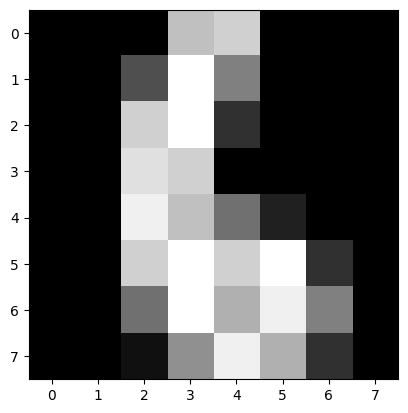

In [3]:
%matplotlib inline
# The original digit has been flattened, so we reshape it back to its original form
# Check the dimensionality of the data, e.g. the first element in the data set X[0]
print (X[0].shape)
print (X[0])

# Reshape it to 8x8 to recover the original image
print (X[0].reshape((8,8)))


# Show the image using scikit.image package
import matplotlib.pyplot as plt

plt.imshow(X[6].reshape((8,8)),cmap="gray",interpolation="nearest")

Let us check some of the examples we have in our data set.

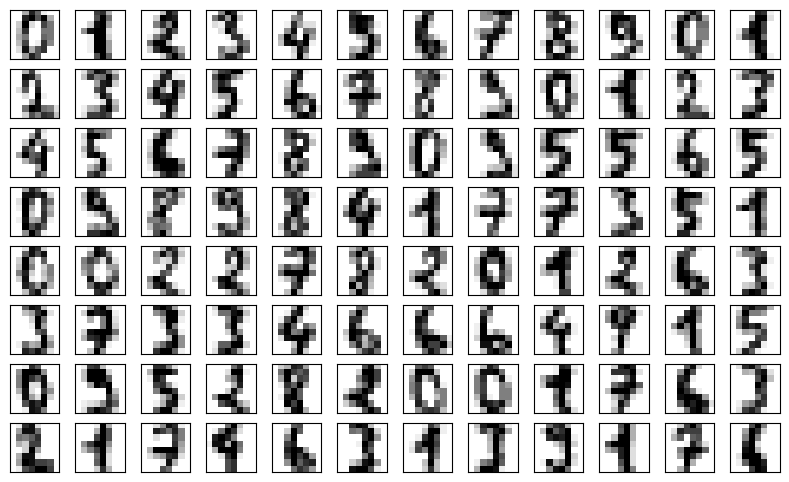

In [4]:
#Visualize some of the data.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(8, 12, subplot_kw={'xticks':[], 'yticks':[]})
for i in range(ax.size):
    ax.flat[i].imshow(digits.data[i].reshape(8, 8),
                      cmap=plt.cm.binary)
fig.set_size_inches((10,6))

A problem in Scikit-Learn is modeled as follows:

+ Input data is structured in Numpy arrays. The size of the array is expected to be [n_samples, n_features]:

    + *n_samples*: The number of samples ($N$): each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
  
    + *n_features*: The number of features ($d$) or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean, discrete-valued or even cathegorical.

$${\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1d}\\
x_{21} & x_{22} & \cdots & x_{2d}\\
x_{31} & x_{32} & \cdots & x_{3d}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{Nd}\\
\end{matrix}
\right]$$

$${\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]$$
    

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. 

**Example** *Consider a text document representation. Given a text document we want to build a representation for it. In this case we could use as a description of the document a dictionary with all possible words in our language and create a description of the document as the number of times a certain word appears in the document. Each document is a sample and each value counting the number of times a word appear in the text is a feature. Observe that a single document will use just a handful of words. Thus there are many words not used and their representation will be zero. This is a case where scipy.sparse matrices can be useful, in that they are much more memory-efficient than numpy arrays.*

#### Data set jargon

Considering data arranged as in the previous section we refer to:

+ the **columns** as features, attributes, dimensions, regressors, covariates, predictors, independent variables,
+ the **rows** as instances, examples, samples.
+ the **target** as label, outcome, response, dependent variable.

**QUESTION:** Consider the following problem: *We are asked to develop a product similar to Shazzam(tm). This is, recognize the name of a song given a small sample of the music.*
<p>
Discuss and describe a posible feature vector for this problem with your partner.
</div>

### 4.2 Learning and predicting with Scikit-Learn - save the model

All objects in scikit-learn share a uniform and limited API consisting of three complementary interfaces:

+ an estimator interface for building and fitting models (.fit());
+ a predictor interface for making predictions (.predict());
+ a transformer interface for converting data.


Let us choose a model and fit the training data:

In [5]:
#Train a classifier using .fit()
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

[KNN explained](https://www.youtube.com/watch?v=HVXime0nQeI&ab_channel=StatQuestwithJoshStarmer)

In [6]:
#Save the model to disk (it can alternatively be stored in a string)
import pickle
ofname = open('my_classifier.pkl', 'wb')
s = pickle.dump(knn,ofname)
ofname.close()
print (s)

#Clear the namespace
%reset -f

None


In [7]:
#Check we don't have the variable in the namespace. This should give a NameError
# print(knn)

Now let us do some **exploitation** of the model. In this example we use the same data but in general new and unseen data is to be provided to the trained classifier.

In [8]:
from sklearn import neighbors
from sklearn import datasets
import pickle
ofname = open('my_classifier.pkl','rb') #Open in binary format. You never know how it was saved.
digits = datasets.load_digits()
X = digits.data
knn = pickle.load(ofname)



In [9]:
#Compute the prediction according to the model
print(knn.predict(X[0,:].reshape(1, -1)))

[0]


In [10]:
#Check the target value.
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
# predicted model
y_pred=knn.predict(X)

In order to evaluate the performance of the classifier, prediction accuracy can be used:
$$acc  = \frac{\text{\# of correct predictions}}{N}$$

Each estimator has a `.score()` method that invokes the default scoring metric. In the case of k-Nearest Neighbors, this is classification accuracy.

In [12]:
#Check the performance on the training set 
# - IF YOU KNOW WHAT YOU ARE DOING YOU WILL NEVER DO THIS AGAIN!
knn.score(X,y)

0.9855314412910406

**HOME EXERCISE:** Put all the problem steps in one cell and check it runs.
</div>

In [13]:
#EXERCISE#Fill this cell with the exercise solution.
from sklearn import datasets
data= datasets.load_digits()
X,y = data.data, data.target

from sklearn import neighbors
from sklearn import tree
## FILL THE REST

### 4.3 More intuition about the data: The feature space

When we work with data, especially in machine learning, we often start with raw values. In our case, we're dealing with images of digits, and the raw values are the gray levels of each pixel in these images. To make sense of this data and potentially improve how we distinguish between different digits, we can extract or derive new features from the raw data. These features are characteristics we compute from the data, based on our understanding of what might be important to identify the differences between classes (in this case, different digit types).

#### Derived Features: Symmetry and Area

For the digits dataset, we consider three specific features that might help us differentiate between digits:

- **Horizontal Symmetry**: How similar is the left half of the image to the right half?
- **Vertical Symmetry**: How similar is the top half of the image to the bottom half?
- **Area**: The sum of all pixel values, which can be thought of as the "weight" of the digit.

#### The Code Explained

##### Visualizing Symmetry

First, we're going to look at one digit and explore its symmetry:


/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


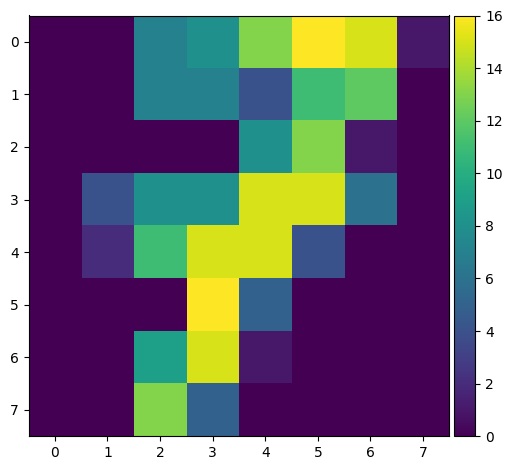

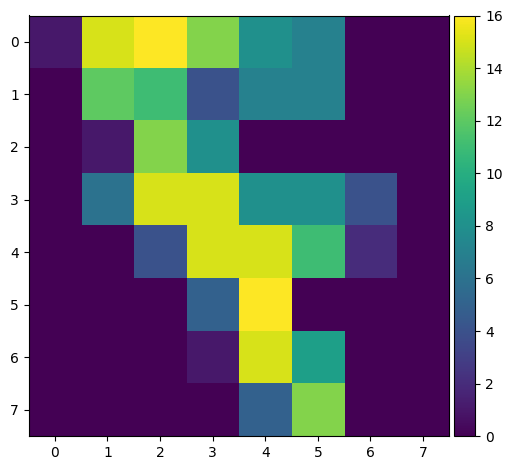

In [14]:
from skimage import io as io

# Reshape the 8th digit in the dataset to its original 8x8 form.
tmp = X[7].reshape((8,8))

# Visualize the original digit and its horizontal mirror.
io.imshow(tmp)
io.show()
io.imshow(tmp[:,::-1]) # This flips the image horizontally.
io.show()

This part of the code simply shows us the original image of a digit and its horizontally flipped version to give us a visual intuition about symmetry.

**Calculating New Features:**

Next, we calculate the three features (horizontal symmetry, vertical symmetry, and area) for each digit in the dataset:

In [15]:
import numpy as np

# Initialize an array to hold the new features for each image.
Xnew = np.zeros((y.shape[0],3))

for i in range(y.shape[0]):
    area = sum(X[i]) # Calculate the area feature.
    tmp = X[i].reshape((8,8))
    symH = tmp * tmp[:,::-1] # Calculate horizontal symmetry.
    symV = tmp * tmp[::-1,:] # Calculate vertical symmetry.
    
    # Store the calculated features.
    Xnew[i,:] = [sum(symH.flatten()), area, sum(symV.flatten())]

print(Xnew)
print(Xnew.shape)

[[2808.  294. 2886.]
 [3670.  313. 3888.]
 [2810.  344. 3512.]
 ...
 [4776.  374. 4734.]
 [3656.  344. 3248.]
 [4422.  392. 4220.]]
(1797, 3)


In [16]:
#Save this dataset for later use
import pickle
ofname = open('my_digits_data.pkl', 'wb')
s = pickle.dump([Xnew,y],ofname)
ofname.close()
print ('DONE')

DONE


This script transforms each image to compute and store our three chosen features: the sums of the products of the image and its horizontal and vertical mirrors (for symmetry) and the sum of pixel values (for area).

Visualizing the Feature Space
Finally, we visualize how two digits, 0 and 6, differ in this new feature space:

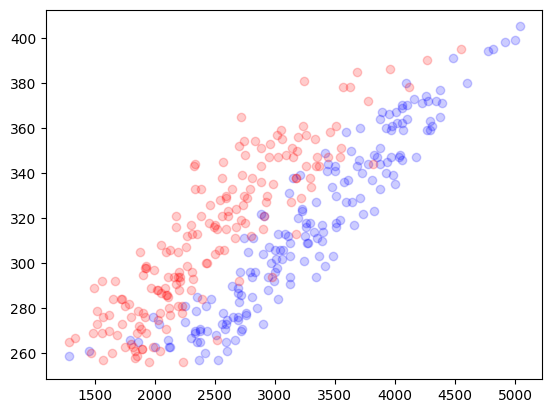

In [17]:
import matplotlib.pyplot as plt

# Find indices of digits 0 and 6.
idxA = y==0
idxB = y==6

# Choose which features to plot.
feature1 = 0
feature2 = 1

# Plot the features for digits 0 and 6.
plt.figure()
plt.scatter(Xnew[idxA, feature1], Xnew[idxA, feature2], c='blue', alpha=0.2)
plt.scatter(Xnew[idxB, feature1], Xnew[idxB, feature2], c='red', alpha=0.2)
plt.show()

This section creates a scatter plot to visually compare the selected features for digits 0 and 6. The plot helps us see if and how these digits can be distinguished based on the new features we've created.

Conclusion
By deriving new features from the raw data, we can often uncover patterns that help us differentiate between classes more effectively

**Exercise** Change feature1 and feature2 axis $\in \{0,1,2\}$ and select the most suitable view for classification purposes. Why did you select that view?
</div>

The process of using knowledge domain information in order to create discriminant features is called <span style="color:red">feature extraction</span>.

#### Raw Data vs. Feature Extraction

When working with machine learning models, we often encounter two primary approaches to preparing our data: using raw data directly or extracting features from this data. Both approaches have their advantages and drawbacks, which are crucial to understand for effective model development.

#### Raw Data

**Advantages:**

- **Accessibility:** Raw data can be used directly without the need for additional processing or transformation. This approach does not require domain-specific knowledge, making it straightforward and accessible to practitioners at all levels.

**Drawbacks:**

- **Redundancy and Dimensionality:** Raw data is often highly redundant, containing information that may not be necessary for making accurate predictions or classifications. This redundancy typically results in very large dimensional spaces, which can complicate model training and lead to longer computation times.
- **Unknown Discriminability:** With raw data, it's not always clear which features are important for distinguishing between classes. This lack of clarity can hinder a model's ability to learn effectively, as it may focus on irrelevant features.

#### Feature Extraction

**Advantages:**

- **Discriminant Information:** Feature extraction aims to identify and capture the most relevant information in the data for the task at hand. By focusing on discriminant information, models can often achieve better performance with less data.
- **Reduced Dimensionality and Complexity:** Through feature extraction, data is transformed into a lower-dimensional space that reflects the most important aspects of the original data. This reduction in dimensionality and complexity can lead to faster training times and more efficient models.

**Drawbacks:**

- **Domain Knowledge Required:** Unlike using raw data, feature extraction often requires domain-specific knowledge to identify which features are likely to be informative. This requirement can make feature extraction less accessible to those without expertise in the domain.

**Exercise:** Train a new classifier on the new training set and check its training performance.
</div>

In [18]:
#EXERCISE#TODO NOW!!!



#### Measuring Performance (lets not use score()...)

Measuring Performance

There are different criteria for measuring the performance of a classifier, and the most adequate metric is usually problem-dependent. When no prior information on the problem is given, we usually use classification accuracy. When we are dealing with a multi-class problem (there are many classes to choose from), we may use the confusion matrix. The elements of the confusion matrix \( M \) are defined as follows:

$$M(i,j) = \text{\# of samples from class } j \text{ predicted as class } i$$

[Confusion Matrix](https://www.youtube.com/watch?v=Kdsp6soqA7o&ab_channel=StatQuestwithJoshStarmer)

Let us check these values:


Classification accuracy: 0.9855314412910406


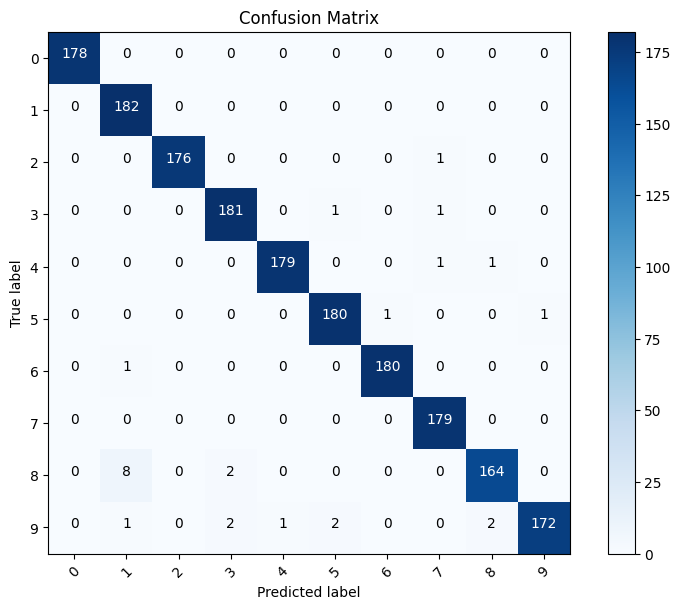

In [19]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

def plot_confusion_matrix(y, y_pred):
    # Generate the confusion matrix
    cm = metrics.confusion_matrix(y, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    # Adding tick marks and labels for clarity
    classes = np.unique(y)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Adding text annotations to each cell in the confusion matrix
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Example usage
# Assume y and y_pred are defined elsewhere in your code
print("Classification accuracy:", metrics.accuracy_score(y, y_pred))
plot_confusion_matrix(y, y_pred)
plt.show()

**QUESTION:** Which are the classes with more confusion?
</div>

### (not needed in class) 4.4 Training and testing. 

#### More intuition behind the learning process

Understanding the learning process in machine learning is crucial for effectively applying models to solve problems. The code snippet below demonstrates how to train a K Nearest Neighbors (KNN) classifier using a featurized dataset, make predictions, and evaluate the model's performance. This process is fundamental to machine learning and provides insights into how models learn from data to make predictions.

Classification accuracy: 1.0


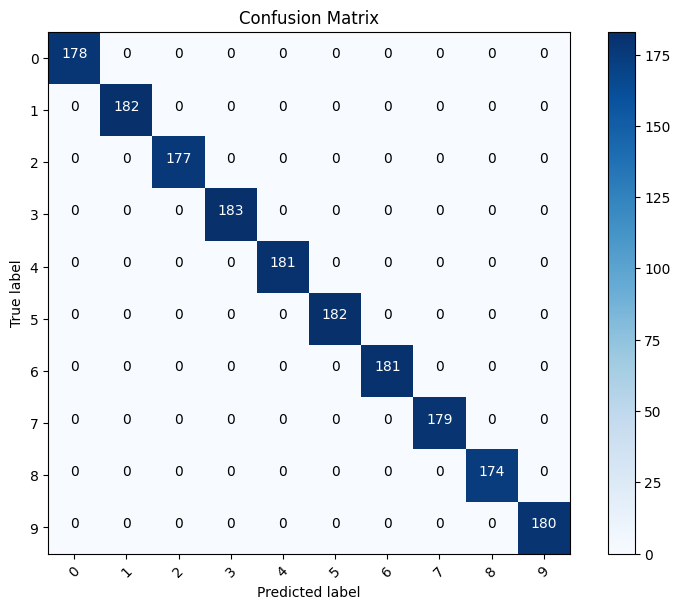

In [20]:
from sklearn import neighbors

# Create an instance of the KNeighborsClassifier with 1 neighbor.
# This means the algorithm will consider the closest neighbor to make a prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

# Train the classifier on the dataset.
# Here, Xnew represents the featurized version of the original data, and y represents the labels.
# The .fit() method is used to train the model using the provided features and labels.
knn.fit(Xnew, y)

# Make predictions on the dataset using the trained model.
# The .predict() method is applied to the featurized data Xnew, generating predictions yhat.
yhat = knn.predict(Xnew)

# Print the classification accuracy of the model.
# The accuracy_score function compares the predicted labels (yhat) with the true labels (y) to calculate the accuracy.
print("Classification accuracy:", metrics.accuracy_score(yhat, y))

# Plot the confusion matrix for the true labels and predicted labels.
# This function visually represents the performance of the classification model,
# showing how many predictions are correct (diagonal) versus incorrect (off-diagonal).
plot_confusion_matrix(y, yhat)

# Note: The featurized model (Xnew) is used here instead of the original dataset,
# indicating that preprocessing steps or feature extraction techniques have been applied to the original data.

**QUESTION :** 

<li> Which is the accuracy of this classifier on the training set?
<li> Do we expect to work better than the former one on new data?
</div>

#### (not needed in class) Understanding Classifier Performance with Train/Test Splits

Until now, we've evaluated our classifier's performance using the same dataset on which it was trained. While this can provide some insights into how well the model has learned the training data, it doesn't accurately represent how the model will perform on new, unseen data. In real-world applications, we expect our model to make predictions on data it has never encountered during the training phase.

#### The Importance of Train/Test Splits

To simulate a more realistic scenario and better understand the model's generalization ability, we split our dataset into two separate sets:

- **Training set:** This portion of the data is used to train the model. It learns from this data, adjusting its parameters to fit the given input features to the corresponding target values.
- **Testing set:** This set is kept separate from the training process. After the model has been trained, we use this data to evaluate its performance. The testing set acts as a proxy for new, unseen data.

#### Why Split?

Splitting the data helps us to:

1. **Assess generalization:** By evaluating the model on data it hasn't seen before, we can measure how well it generalizes to new examples. This is a better indicator of its real-world performance.
2. **Detect overfitting:** If a model performs exceptionally well on the training data but poorly on the testing data, it's likely overfitting. Overfitting happens when a model learns the noise in the training data instead of the underlying pattern, making it perform poorly on any data outside the training set.
3. **Tune parameters:** The train/test split allows us to adjust the model's parameters and select the best model configuration. By comparing the model's performance on the training and testing sets, we can make informed decisions about parameter settings and model choices.

#### Implementing Train/Test Splits

In practice, the dataset is randomly split into training and testing sets, often with ratios like 70%/30%, 80%/20%, or similar, depending on the dataset size and the specific problem. Tools like `train_test_split` from `sklearn.model_selection` can automate this process, ensuring that the data is randomly and appropriately divided.

By adopting this approach, we ensure that our model evaluation is more robust and indicative of how the model will perform in practical applications, thereby increasing our confidence in its predictions on unseen data.

(1258, 3) (539, 3) (1258,) (539,)

TRAINING STATS:
Classification accuracy: 1.0


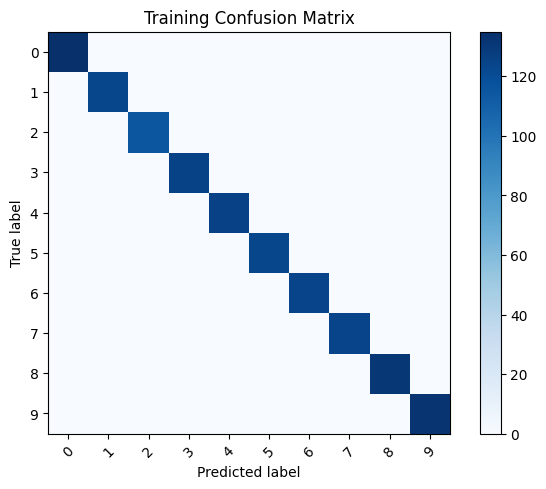

In [21]:
# Reset the workspace to ensure a clean environment
%reset -f

# Load the digits dataset from a pickle file
import pickle

# Open the file containing the dataset
with open('my_digits_data.pkl', 'rb') as ofname:
    # Load the dataset from the file
    data = pickle.load(ofname)
    # Assign features to X and target labels to y
    X, y = data[0], data[1]

# Prepare the dataset for a realistic simulation: randomize and split it into training and testing subsets
import numpy as np

# Randomly permute a sequence of indices based on the size of y
perm = np.random.permutation(y.size)

# Define the proportion of the dataset to allocate for training
PRC = 0.7
# Calculate the split point for dividing the dataset
split_point = int(np.ceil(y.shape[0] * PRC))

# Split the dataset into training and testing sets based on the calculated split point
X_train = X[perm[:split_point]]
y_train = y[perm[:split_point]]

X_test = X[perm[split_point:]]
y_test = y[perm[split_point:]]

# Output the shapes of the training and testing datasets for verification
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Train a K-Nearest Neighbors classifier on the training data
from sklearn import neighbors

# Initialize the classifier with 1 neighbor for simplicity
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels for the training set and evaluate performance
yhat = knn.predict(X_train)

# Import necessary libraries for performance evaluation
from sklearn import metrics
import matplotlib.pyplot as plt

# Print training statistics
print("\nTRAINING STATS:")
print("Classification accuracy:", metrics.accuracy_score(yhat, y_train))

# Visualize the confusion matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_train)))
    plt.xticks(tick_marks, np.unique(y_train), rotation=45)
    plt.yticks(tick_marks, np.unique(y_train))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Generate the confusion matrix from the training data predictions
cm = metrics.confusion_matrix(y_train, yhat)
# Call the function to plot the improved confusion matrix
plot_confusion_matrix(cm, "Training Confusion Matrix")

TESTING STATS:
Classification accuracy: 0.22263450834879406


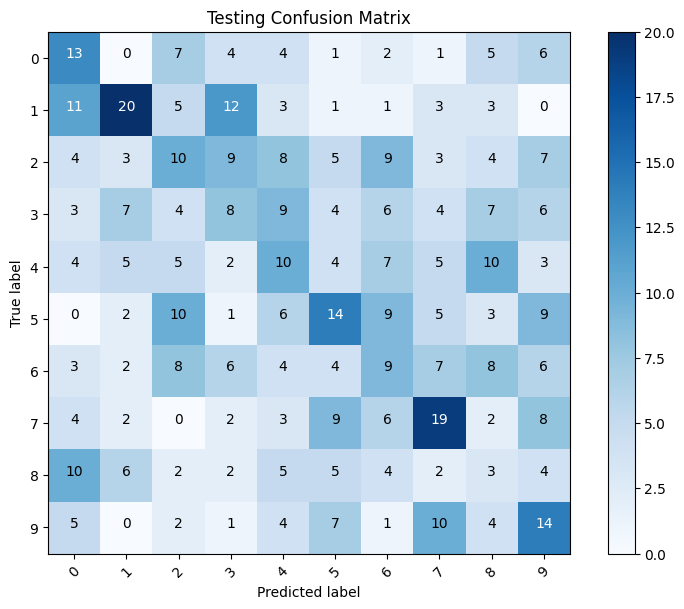

In [22]:
# Predict the labels for the test set to evaluate performance
yhat = knn.predict(X_test)

# Print testing statistics
print("TESTING STATS:")
print("Classification accuracy:", metrics.accuracy_score(yhat, y_test))

# Function to plot confusion matrix with annotations for clarity
def plot_confusion_matrix_with_numbers(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function plots a confusion matrix with the actual counts displayed on the matrix for better clarity.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))

    # Loop over data dimensions and create text annotations.
    fmt = 'd'  # Format as decimal integer
    thresh = cm.max() / 2.  # Threshold for text color based on background
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Generate the confusion matrix from the test data predictions
cm_test = metrics.confusion_matrix(y_test, yhat)

# Plot the improved confusion matrix with numbers for the test data
plot_confusion_matrix_with_numbers(cm_test, "Testing Confusion Matrix")

plt.show()

#### Understanding Variability in Model Performance

Understanding Variability in Model Performance

When evaluating a model's performance, particularly in machine learning, it's important to recognize that the results can vary each time the process is executed. This variation is due to several factors, including the randomness in the splitting of the dataset into training and testing sets, and the inherent stochastic nature of many learning algorithms.

#### Why Does Performance Vary?

- **Data Splitting:** Each time we randomly split the dataset into training and testing sets, the model is exposed to slightly different data during training. This can lead to variations in how well the model learns and generalizes.
- **Model Initial Conditions:** For algorithms that involve random initialization (e.g., starting weights in neural networks), different initial conditions can lead to different learning paths and outcomes.
- **Sampling Variance:** The subset of data chosen for training and testing might not fully represent the overall distribution of the dataset, leading to variations in performance metrics.

#### Simulating Real-World Conditions

To more accurately approximate the test error and account for these variations, we can employ a technique known as *cross-validation*. More simply, however, we can repeat the process of splitting, training, and testing the model multiple times, each time with a different random split. By averaging the performance metrics across these iterations, we can obtain a more stable and reliable estimate of the model's performance.

#### Implementing Multiple Iterations

Let's enhance our simulation by executing the train-test split, training, and evaluation process multiple times. After each iteration, we'll record the model's performance metrics. Once all iterations are complete, we'll calculate the average performance. This approach gives us a more nuanced understanding of how our model is likely to perform on unseen data, making our evaluation more robust and realistic.

This process not only helps in mitigating the effects of randomness and variance but also provides insights into the consistency and reliability of the model under different conditions. By understanding and applying these concepts, we can make more informed decisions about model selection, tuning, and deployment.


In [23]:
#The splitting can be done using the tools provided by sklearn:
from sklearn import model_selection

from sklearn import neighbors
from sklearn import metrics

PRC = 0.3
acc=np.zeros((10,))
for i in range(10):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=PRC)
    knn = neighbors.KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    yhat=knn.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat, y_test)
acc.shape=(1,10)
print ("Mean expected error: "+str(np.mean(acc[0])))

Mean expected error: 0.2172222222222222


In [24]:
acc

array([[0.23333333, 0.21666667, 0.21111111, 0.20740741, 0.20740741,
        0.22407407, 0.19444444, 0.23703704, 0.21111111, 0.22962963]])

#### Clarifying Error Metrics in Machine Learning

Clarifying Error Metrics in Machine Learning

In the realm of machine learning and statistical learning theory, it's essential to quantify the performance of our models. To do this, we introduce specific nomenclature for the error metrics we compute during model training and evaluation.

#### In-Sample Error ($E_{\text{in}}$)

- **Definition:** The in-sample error, also known as the training error, measures the error over all observed data samples within the training set. It reflects how well the model fits the data it was trained on.
- **Formula:** The mathematical representation is given by:

  $$E_{\text{in}} = \frac{1}{N}\sum\limits_{i=1}^{N} e(x_i,y_i)$$

  where $N$ is the number of samples in the training set, and $e(x_i,y_i)$ denotes the error of the prediction on the $i$-th sample.

#### Out-of-Sample Error ($E_{\text{out}}$)

- **Definition:** The out-of-sample error, or generalization error, measures the expected error on unseen data. This metric is crucial as it indicates the model's ability to generalize beyond the training data.
- **Approximation:** We approximate $E_{\text{out}}$ by holding out a portion of the training data for testing purposes, thus not exposing the model to this data during training.

  $$E_{\text{out}}=\mathbb{E}_{x,y}(e(x,y))$$

  Here, the expectation $\mathbb{E}_{x,y}$ reflects the average error over all possible unseen samples.

#### Instantaneous Error ($e(x_i,y_i)$)

- **Definition:** To measure the error for individual predictions, we define the instantaneous error. This metric assesses the error on a single data point.
- **Example:** In the context of classification, we might use the indicator function to evaluate whether a sample is correctly classified:

  $$e(x_i,y_i) = I[h(x_i)=y_i] =\left\{
  \begin{align}
  1 & \text{ if } h(x_i)=y_i\\
  0 & \text{ otherwise } \\
  \end{align}
  \right.$$

  where $h(x_i)$ is the predicted label for sample $x_i$, and $y_i$ is the true label.

#### Understanding the Relationship Between $E_{\text{in}}$ and $E_{\text{out}}$

It's a fundamental principle that the out-of-sample error is expected to be greater than or equal to the in-sample error:

$$E_{\text{out}} \geq E_{\text{in}}$$

This inequality underscores the challenge of overfitting, where a model might perform exceptionally well on the training data ($E_{\text{in}}$ is low) but poorly on new, unseen data ($E_{\text{out}}$ is high). The primary goal in model training is to minimize $E_{\text{out}}$, ensuring that our model generalizes well to new data.

### 4.5 Model Selection (I)



In the context of machine learning, **model selection** is a critical process where we determine the most suitable classifier or model for a specific application. This decision is based on the model's performance, typically evaluated using the expected error on a test set.

#### Why Model Selection Matters

The primary goal of model selection is to identify the model that best generalizes to unseen data. Since different models have varying strengths and weaknesses depending on the nature of the data and the task at hand, selecting the "best" model is crucial for achieving high performance.

#### Simplistic Model Selection Scenario

Consider a scenario where we have a collection of different classifiers at our disposal. The objective is straightforward: to select the classifier that performs the best according to a predetermined metric, usually the one with the lowest error rate on the test set.

#### Steps for Model Selection

1. **Training Multiple Classifiers:** Begin by training each candidate model on the same training dataset. This ensures that each model learns from the same information.
2. **Evaluating on the Test Set:** Next, evaluate each model's performance on a separate test set. This test set should not have been seen by the models during training, ensuring that our evaluation reflects each model's ability to generalize.
3. **Comparing Error Rates:** Calculate the error rate (or any other relevant performance metric) for each model on the test set. The error rate gives us a quantitative measure of how often the model makes incorrect predictions.
4. **Selecting the Best Model:** Finally, select the model with the lowest error rate on the test set. This model is considered the "best" among the candidates for our specific application.

#### Considerations

- **Error Rate as a Metric:** While using the error rate is common, other metrics such as precision, recall, F1 score, or AUC might be more appropriate depending on the application's specific requirements.
- **Validation Sets:** In addition to a test set, a validation set can also be used during model selection. This allows for the adjustment of model hyperparameters without using the test set, which should be reserved for the final evaluation.
- **Complexity and Performance:** It's essential to balance model complexity with performance. A more complex model might yield a slightly lower error rate but at the cost of interpretability, computational efficiency, or the risk of overfitting.

By carefully following the model selection process, we can confidently choose a classifier that offers the best trade-off between accuracy, complexity, and generalizability for our application.


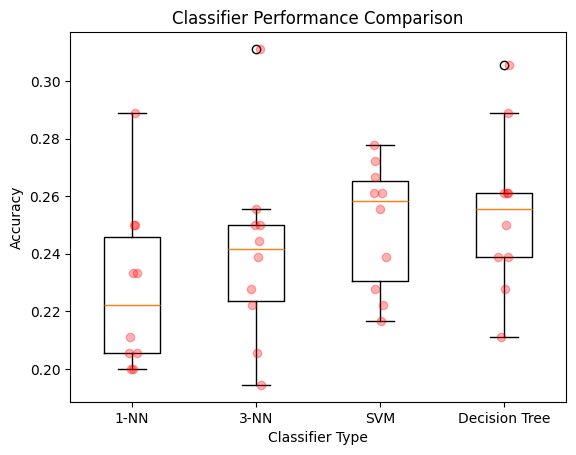

In [25]:
# Reset the workspace to ensure a clean environment
%reset -f

# Load the digits dataset from a pickle file
import pickle

# Open the file containing the dataset
with open('my_digits_data.pkl', 'rb') as ofname:
    # Load the dataset from the file
    data = pickle.load(ofname)
    # Assign features to X and target labels to y
    X, y = data[0], data[1]

# Import necessary libraries from sklearn for model selection, classifiers, and metrics
from sklearn import model_selection
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported for array operations

# Set the proportion of the dataset to be used for testing
PRC = 0.1

# Initialize an array to store the accuracy results for each classifier across iterations
acc_r = np.zeros((10,4))

# Repeat the experiment 10 times to get a distribution of performance metrics
for i in range(10):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=PRC)
    
    # Initialize classifiers with specific configurations
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)  # 1-Nearest Neighbor classifier
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)  # 3-Nearest Neighbors classifier
    svc = svm.SVC()  # Support Vector Machine classifier
    dt = tree.DecisionTreeClassifier()  # Decision Tree classifier
    
    # Train each classifier on the training set
    nn1.fit(X_train, y_train)
    nn3.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    
    # Predict the labels for the test set using each trained classifier
    yhat_nn1 = nn1.predict(X_test)
    yhat_nn3 = nn3.predict(X_test)
    yhat_svc = svc.predict(X_test)
    yhat_dt = dt.predict(X_test)
    
    # Calculate and store the accuracy for each classifier
    acc_r[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc_r[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc_r[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc_r[i][3] = metrics.accuracy_score(yhat_dt, y_test)

# Visualize the accuracy results for each classifier using a boxplot
plt.boxplot(acc_r);

# Overlay individual accuracy results as red dots for visual comparison
for i in range(4):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape) + (np.random.rand(10,)-0.5) * 0.1
    plt.plot(xderiv, acc_r[:,i], 'ro', alpha=0.3)
    
# Customize the plot with appropriate labels
ax = plt.gca()
ax.set_xticklabels(['1-NN', '3-NN', 'SVM', 'Decision Tree'])

plt.xlabel('Classifier Type')
plt.ylabel('Accuracy')
plt.title('Classifier Performance Comparison')

# Show the plot
plt.show()

### 4.6 Understanding Cross-Validation Techniques

Understanding Cross-Validation Techniques

Cross-validation is a cornerstone method in machine learning for assessing how the results of a statistical analysis will generalize to an independent dataset. It's especially useful in scenarios where the goal is to predict, and one wants to estimate how accurately a predictive model will perform in practice. The process we've discussed is a form of cross-validation, which encompasses several different methods, including **leave-one-out** and **K-fold cross-validation**.

#### Leave-One-Out Cross-Validation

- **How it Works:** In leave-one-out cross-validation (LOOCV), for a dataset with $N$ samples, the model is trained using $N-1$ samples and tested on the remaining single sample. This process is repeated $N$ times, with each of the $N$ samples used exactly once as the test set.
- **Advantages:** LOOCV uses nearly all the data for training, making it an excellent option for small datasets.
- **Drawbacks:** It can be computationally expensive for larger datasets since the model needs to be retrained from scratch $N$ times.

#### K-Fold Cross-Validation

- **How it Works:** In K-fold cross-validation, the training set is randomly partitioned into $K$ equal-sized subsamples. Of the $K$ subsamples, a single subsample is retained as the validation data for testing the model, and the remaining $K-1$ subsamples are used as training data. The cross-validation process is then repeated $K$ times (the folds), with each of the $K$ subsamples used exactly once as the validation data.
- **Advantages:** This method is less computationally expensive than LOOCV, especially for large datasets. It also allows for a more thorough mixing of the data, since each fold is used for both training and validation.
- **Estimating Confidence:** K-fold cross-validation provides not only an estimation of the model's performance but also allows for the computation of a confidence interval around the estimated performance using the variation in performance across the folds.

#### Choosing Between Cross-Validation Methods

- **Dataset Size:** For smaller datasets, LOOCV might be preferable due to its intensive use of data for training. For larger datasets, K-fold cross-validation is often more practical due to its reduced computational load.
- **Variance and Bias:** K-fold cross-validation tends to have lower variance as an estimator of the test error since multiple testing sets are used and averaged over. LOOCV, by testing on only one example at a time, can have higher variance.
- **Confidence Intervals:** The ability to estimate confidence intervals in K-fold cross-validation helps in understanding the reliability of the model evaluation process.

In summary, the choice of cross-validation technique can significantly impact the efficiency and effectiveness of model selection and evaluation processes. The key is to balance the computational cost with the benefits of each method's approach to handling variance and leveraging available data.

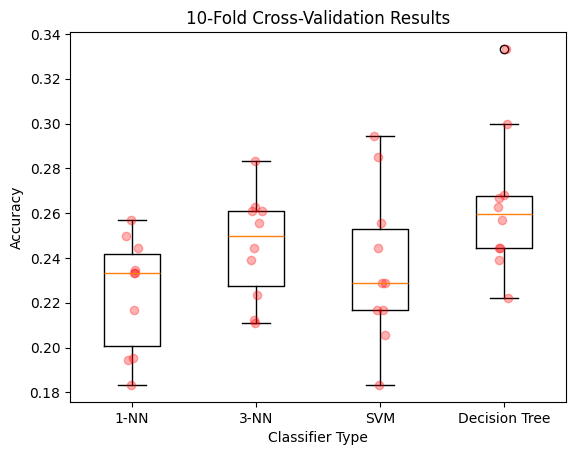

In [26]:
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, tree, svm, metrics

# Initialize an array to hold the accuracy scores for each fold and model
acc = np.zeros((10,4))

# Create a KFold object for 10-fold cross-validation
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
# Get the number of splits (this line can be omitted as we don't use its result directly)
kf.get_n_splits()

# Loop counter
i = 0
# Iterate over each fold defined by KFold
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets based on the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize classifiers
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)  # 1-nearest neighbor
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)  # 3-nearest neighbors
    svc = svm.SVC()  # Support vector machine
    dt = tree.DecisionTreeClassifier()  # Decision tree
    
    # Train each classifier on the training set
    nn1.fit(X_train, y_train)
    nn3.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    
    # Make predictions on the testing set
    yhat_nn1 = nn1.predict(X_test)
    yhat_nn3 = nn3.predict(X_test)
    yhat_svc = svc.predict(X_test)
    yhat_dt = dt.predict(X_test)
    
    # Calculate and store the accuracy for each classifier
    acc[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc[i][3] = metrics.accuracy_score(yhat_dt, y_test)
    # Increment the loop counter
    i += 1

# Plotting the accuracy scores as a boxplot for each classifier
plt.boxplot(acc);
# Overlay individual accuracy scores as red dots for better visualization
for i in range(4):
    xderiv = (i+1)*np.ones(acc[:,i].shape) + (np.random.rand(10,) - 0.5) * 0.1
    plt.plot(xderiv, acc[:,i], 'ro', alpha=0.3)

# Setting the labels for each classifier on the x-axis
ax = plt.gca()
ax.set_xticklabels(['1-NN', '3-NN', 'SVM', 'Decision Tree'])

plt.xlabel('Classifier Type')
plt.ylabel('Accuracy')
plt.title('10-Fold Cross-Validation Results')

plt.show()    

[Text(1, 0, '1-NN'),
 Text(2, 0, '1-NN'),
 Text(3, 0, '3-NN'),
 Text(4, 0, '3-NN'),
 Text(5, 0, 'SVM'),
 Text(6, 0, 'SVM'),
 Text(7, 0, 'Decission Tree'),
 Text(8, 0, 'Decission Tree')]

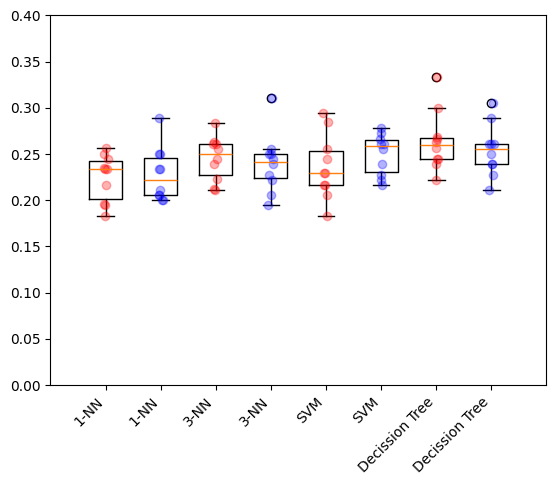

In [27]:
#Just for fun let us put both plots together
fig = plt.figure()
ax = plt.gca()
for i in range(4):
    plt.boxplot([acc[:,i], acc_r[:,i]], positions = [2*i+1,2*i+2], widths = 0.6)
    xderiv = (2*i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)
    xderiv = (2*i+2)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'bo',alpha=0.3)
# set axes limits and labels
plt.xlim(0,9)
plt.ylim(0,0.4)
ax.set_xticklabels(['1-NN','1-NN','3-NN','3-NN','SVM','SVM','Decission Tree','Decission Tree'],rotation = 45, ha="right")


### Summary: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.